## Code development to create a national table

https://mapbox.github.io/rasterio/api/rasterio.mask.html?highlight=mask#module-rasterio.mask

http://thematicmapping.org/downloads/world_borders.php

http://www.gadm.org

https://github.com/mapbox/rasterio-cookbook/blob/master/recipies/mask_shp.py


http://gis.stackexchange.com/questions/151339/rasterize-a-shapefile-with-geopandas-or-fiona-python


## Necessary steps (note, this will also be needed in HELIX project...)

* Extract single feature (country shape)
* Reproject feature to match raster
* Convert vector to raster
* Mask original raster by converted raster
* Calculate statistics over mask
* Add to dictionary.
* Repeat for every feature

In [1]:
import fiona
import rasterio
from rasterio.mask import mask
from rasterio.plot import show
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read shape files using Geopandas

In [45]:
nations = gpd.read_file('/Users/Ben/Downloads/TM_WORLD_BORDERS-0/TM_WORLD_BORDERS-0.3.shp')

In [46]:
nations.head()

,AREA,FIPS,ISO2,ISO3,LAT,LON,NAME,POP2005,REGION,SUBREGION,UN,geometry
0,44,AC,AG,ATG,17.078,-61.783,Antigua and Barbuda,83039,19,29,28,"(POLYGON ((-61.686668 17.02444100000014, -61.7..."
1,238174,AG,DZ,DZA,28.163,2.632,Algeria,32854159,2,15,12,"POLYGON ((2.96361 36.802216, 2.981389 36.80693..."
2,8260,AJ,AZ,AZE,40.430,47.395,Azerbaijan,8352021,142,145,31,(POLYGON ((45.08332100000001 39.76804400000015...
3,2740,AL,AL,ALB,41.143,20.068,Albania,3153731,150,39,8,"POLYGON ((19.436214 41.021065, 19.450554 41.05..."
4,2820,AM,AM,ARM,40.534,44.563,Armenia,3017661,142,145,51,(POLYGON ((45.57305100000013 40.63248800000008...


In [47]:
nations[nations.ISO3 == "GBR"]

,AREA,FIPS,ISO2,ISO3,LAT,LON,NAME,POP2005,REGION,SUBREGION,UN,geometry
206,24193,UK,GB,GBR,53.0,-1.6,United Kingdom,60244834,150,154,826,"(POLYGON ((-6.290832999999964 49.912216, -6.31..."


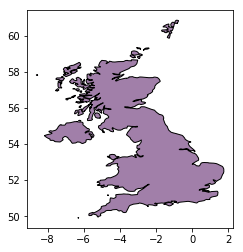

In [48]:
nations[nations.ISO3 == "GBR"].plot()

In [51]:
uk = nations[nations.ISO3 == "GBR"].geometry

### Rasterise

* Use a raster file to extract metadata and use as a template

In [42]:
from rasterio import features

In [36]:
rst_fn = '../eurolst_process/processed.tif'
rst = rasterio.open(rst_fn)
meta = rst.meta.copy()
meta.update(compress='lzw')

In [38]:
meta

{'compress': 'lzw',
 'count': 1,
 'crs': CRS({'lon_0': 10, 'lat_0': 52, 'y_0': 3210000, 'x_0': 4321000, 'ellps': 'GRS80', 'towgs84': '0,0,0,0,0,0,0', 'no_defs': True, 'units': 'm', 'proj': 'laea'}),
 'driver': 'GTiff',
 'dtype': 'uint8',
 'height': 18711,
 'nodata': 0.0,
 'transform': Affine(250.0, 0.0, 2168000.0,
       0.0, -250.0, 5447750.0),
 'width': 22195}

In [ ]:
with rasterio.open(out_fn, 'w', **meta) as out:
    out_arr = out.read(1)

In [53]:
burned = features.rasterize(shapes=uk, fill=0, out=out_arr, transform=meta['transform'])

NameError: name 'out_arr' is not defined

In [52]:
uk

206    (POLYGON ((-6.290832999999964 49.912216, -6.31...
Name: geometry, dtype: object

In [115]:
from shapely.geometry import Point

In [123]:
for boundary in uk.boundary:
    bound = boundary

In [128]:
for xy in bound:
    print(xy)

LINESTRING (-6.290832999999964 49.912216, -6.31138900000002 49.9116590000001, -6.317223000000013 49.91194200000007, -6.317499999999995 49.91527600000006, -6.308056000000022 49.92888600000009, -6.305556000000024 49.93193800000006, -6.301390000000026 49.9336090000001, -6.294999999999959 49.93388400000009, -6.287499999999966 49.92944299999999, -6.285000999999966 49.92666600000013, -6.28000099999997 49.92083000000002, -6.279166999999916 49.91888399999999, -6.286388999999986 49.91388700000005, -6.290832999999964 49.912216) 

LINESTRING (-1.059722000000022 50.68749200000008, -1.168334000000016 50.60194400000006, -1.191388999999958 50.59360500000003, -1.215278000000012 50.58721900000006, -1.241667000000007 50.58249699999999, -1.282500000000027 50.57888800000001, -1.367500000000007 50.61860700000011, -1.473055999999929 50.66082800000009, -1.493610999999987 50.66722100000004, -1.499166999999943 50.66861000000006, -1.512222000000008 50.66888399999999, -1.523333999999977 50.66749600000009, -1.538

In [134]:
for x, y in xy.coords:
    print(x, y)

-0.8197220000000129 60.68888900000013
-0.8349999999999795 60.67333200000013
-0.9355560000000196 60.67443800000012
-0.9586109999999621 60.68249500000013
-0.9655559999999355 60.68804900000009
-0.9597219999999425 60.71138800000011
-0.9388890000000174 60.79444100000012
-0.8830559999999537 60.84221600000012
-0.8783329999999978 60.84444400000007
-0.8061109999999871 60.840553
-0.7727779999999598 60.831108000000086
-0.7677779999999643 60.82888800000012
-0.7580560000000105 60.81777199999999
-0.7572220000000129 60.81388900000002
-0.763610999999969 60.79332699999992
-0.8197220000000129 60.68888900000013


In [87]:
import pprint

In [138]:
with fiona.open("/Users/Ben/Downloads/TM_WORLD_BORDERS-0/TM_WORLD_BORDERS-0.3.dbf", "r") as shapefile:
    geoms = [feature["geometry"] for feature in shapefile]
    props = [feature['properties'] for feature in shapefile ]


In [141]:
geoms[0]

{'coordinates': [[[(-61.686668, 17.024441000000138),
    (-61.73805999999996, 16.98971899999998),
    (-61.82916999999992, 16.996944000000042),
    (-61.87611399999997, 17.016941000000088),
    (-61.88056199999994, 17.019721999999945),
    (-61.883613999999966, 17.02360900000008),
    (-61.88583399999999, 17.028053000000057),
    (-61.88722200000001, 17.033054000000106),
    (-61.89111299999996, 17.094165999999973),
    (-61.88722200000001, 17.10527399999995),
    (-61.88417099999998, 17.10972199999992),
    (-61.832779000000016, 17.16388699999999),
    (-61.826392999999996, 17.167220999999984),
    (-61.794448999999986, 17.163330000000087),
    (-61.78417200000001, 17.15833299999997),
    (-61.74417099999994, 17.13721799999996),
    (-61.674171, 17.09360900000007),
    (-61.670279999999934, 17.090275000000076),
    (-61.66889200000003, 17.084998999999982),
    (-61.66638899999998, 17.04583000000008),
    (-61.667502999999954, 17.040553999999986),
    (-61.682503, 17.027495999999985),


In [140]:
props[0]

OrderedDict([('FIPS', 'AC'),
             ('ISO2', 'AG'),
             ('ISO3', 'ATG'),
             ('UN', 28),
             ('NAME', 'Antigua and Barbuda'),
             ('AREA', 44),
             ('POP2005', 83039),
             ('REGION', 19),
             ('SUBREGION', 29),
             ('LON', -61.783),
             ('LAT', 17.078)])

In [96]:
with fiona.open('/Users/Ben/Downloads/TM_WORLD_BORDERS-0/TM_WORLD_BORDERS-0.3.dbf') as src:
    polydata = src
    pprint.pprint(polydata[1])

{'geometry': {'coordinates': [[(2.96361, 36.802216),
                               (2.981389, 36.806938),
                               (3.001111, 36.809715),
                               (3.024167, 36.808052),
                               (3.031389, 36.806389),
                               (3.042222, 36.800552),
                               (3.056389, 36.79055),
                               (3.068611, 36.779716),
                               (3.089166, 36.75),
                               (3.106389, 36.741943),
                               (3.123055, 36.739441),
                               (3.138333, 36.738327),
                               (3.172222, 36.741386),
                               (3.185553, 36.742775),
                               (3.228055, 36.77861),
                               (3.307222, 36.783051),
                               (3.375833, 36.77166),
                               (3.391111, 36.770828),
                               (3.47

In [ ]:
# out_meta.update({"driver": "GTiff",
#                  "height": out_image.shape[1],
#                  "width": out_image.shape[2],
#                  "transform": out_transform})

# with rasterio.open("/tmp/masked.tif", "w", **out_meta) as dest:
#     dest.write(out_image)

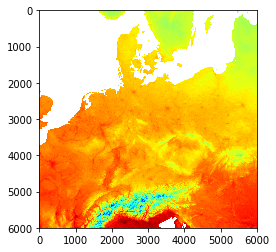

In [49]:
with rasterio.open("../eurolst_process/processed.tif", blockxsize=256, blockysize=256) as inData:
    window = (6000, 12000), (6000, 12000)
    window2 = (6000, 8000), (6000, 8000)
    profile = inData.profile
    cmap = plt.get_cmap('jet')
    dslice = inData.read(1, window=window, masked=False)
    show(inData.read(1, window=window, masked=True), cmap=cmap, interpolation='none')

In [54]:
# geoms = nations[nations.ISO3 == "GBR"].geometry

# with rasterio.open("../eurolst_process/processed.tif") as src:
#     out_image, out_transform = mask(src, geoms, crop=True)
#     out_meta = src.meta.copy()

# # out_meta.update({"driver": "GTiff",
# #                  "height": out_image.shape[1],
# #                  "width": out_image.shape[2],
# #                  "transform": out_transform})

# # with rasterio.open("../eurolst_process/masked.tif", "w", **out_meta) as dest:
# #     dest.write(out_image)